<P> <img src="https://i.ibb.co/gyNf19D/nhslogo.png" alt="nhslogo" border="0" width="100" align="right"><font size="6"><b> CS4132 Data Analytics</b> </font>

# Revision Lab 2 [30 Marks]

## Duration: 1H 30MIN

### Submission Instructions

* Complete the following questions and upload your `.ipynb` file to Coursemology.
* Name the file in the following format: `RevisionLab<num><YourName>.ipynb`
* Before submitting, please ensure you click on "Kernel" > "Restart and Run All" on your jupyter notebook. 

### Important Notes

<div class="alert alert-block alert-danger">
    
*	Complete the code required as stated in each part of the question. 

*	Efficiency & Loops: Use of loops is strictly not allowed, unless otherwise stated in the question.

*	Imports: All necessary imports have been done for you. You are not allowed to import any other libraries.
    
*	Visualization: For all visualizations, make sure you label the axis clearly, and all labels are clearly visible (i.e. you should resize the visualization if necessary). Marks will be penalized for unclear visualizations.
    
*	Testing: 
Note that you should test your own code properly. Your code should still work as intended even when another dataset [with similar data columns but different data points] is used (i.e. no hardcoding).

    
</div>

### Data Acquisition

In [1]:
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split 
import folium as folium
from folium import plugins

In [2]:
df = pd.read_csv("data1.csv")
df

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price
0,2015-01,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,07 - 09,60.0,Improved,1986,255000.0
1,2015-01,ANG MO KIO,3 ROOM,541,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1981,275000.0
2,2015-01,ANG MO KIO,3 ROOM,163,ANG MO KIO AVE 4,01 TO 03,69.0,New Generation,1980,285000.0
3,2015-01,ANG MO KIO,3 ROOM,446,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1979,290000.0
4,2015-01,ANG MO KIO,3 ROOM,557,ANG MO KIO AVE 10,07 TO 09,68.0,New Generation,1980,290000.0
...,...,...,...,...,...,...,...,...,...,...
73814,2018-09,YISHUN,EXECUTIVE,606,YISHUN ST 61,10 TO 12,145.0,Apartment,1987,620000.0
73815,2018-09,YISHUN,EXECUTIVE,824,YISHUN ST 81,07 TO 09,142.0,Apartment,1987,630000.0
73816,2018-09,YISHUN,EXECUTIVE,824,YISHUN ST 81,07 TO 09,145.0,Apartment,1987,625000.0
73817,2018-09,YISHUN,MULTI-GENERATION,666,YISHUN AVE 4,04 - 06,179.0,Multi Generation,1987,780000.0


### Data Cleaning

#### a)	[1m] Drop all rows that contain some missing data (could be in any column) from df (i.e. df should be updated such that there is no longer any missing data).

In [3]:
# Your Solution
df = df.dropna()

In [4]:
df #run this code to display the df

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price
0,2015-01,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,07 - 09,60.0,Improved,1986,255000.0
1,2015-01,ANG MO KIO,3 ROOM,541,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1981,275000.0
2,2015-01,ANG MO KIO,3 ROOM,163,ANG MO KIO AVE 4,01 TO 03,69.0,New Generation,1980,285000.0
3,2015-01,ANG MO KIO,3 ROOM,446,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1979,290000.0
4,2015-01,ANG MO KIO,3 ROOM,557,ANG MO KIO AVE 10,07 TO 09,68.0,New Generation,1980,290000.0
...,...,...,...,...,...,...,...,...,...,...
73814,2018-09,YISHUN,EXECUTIVE,606,YISHUN ST 61,10 TO 12,145.0,Apartment,1987,620000.0
73815,2018-09,YISHUN,EXECUTIVE,824,YISHUN ST 81,07 TO 09,142.0,Apartment,1987,630000.0
73816,2018-09,YISHUN,EXECUTIVE,824,YISHUN ST 81,07 TO 09,145.0,Apartment,1987,625000.0
73817,2018-09,YISHUN,MULTI-GENERATION,666,YISHUN AVE 4,04 - 06,179.0,Multi Generation,1987,780000.0


#### b) [1m] There are some inconsistencies in how the range of storey in the column storey_range (e.g. 07 - 09 vs 07 TO 09) is displayed. Update all records such that all ranges are represented using TO instead of -. 

In [5]:
# Your Solution
df.storey_range = df.storey_range.str.replace('-', 'TO')

C:\Users\user\AppData\Local\Temp\ipykernel_27840\2821913904.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.storey_range = df.storey_range.str.replace('-', 'TO')


In [6]:
df #run this code to display the df

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price
0,2015-01,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,07 TO 09,60.0,Improved,1986,255000.0
1,2015-01,ANG MO KIO,3 ROOM,541,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1981,275000.0
2,2015-01,ANG MO KIO,3 ROOM,163,ANG MO KIO AVE 4,01 TO 03,69.0,New Generation,1980,285000.0
3,2015-01,ANG MO KIO,3 ROOM,446,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1979,290000.0
4,2015-01,ANG MO KIO,3 ROOM,557,ANG MO KIO AVE 10,07 TO 09,68.0,New Generation,1980,290000.0
...,...,...,...,...,...,...,...,...,...,...
73814,2018-09,YISHUN,EXECUTIVE,606,YISHUN ST 61,10 TO 12,145.0,Apartment,1987,620000.0
73815,2018-09,YISHUN,EXECUTIVE,824,YISHUN ST 81,07 TO 09,142.0,Apartment,1987,630000.0
73816,2018-09,YISHUN,EXECUTIVE,824,YISHUN ST 81,07 TO 09,145.0,Apartment,1987,625000.0
73817,2018-09,YISHUN,MULTI-GENERATION,666,YISHUN AVE 4,04 TO 06,179.0,Multi Generation,1987,780000.0


#### c) [2m] Split the data in column month into two columns year and month. The year should be the first column in df, followed by month and the rest of the data. 

In [7]:
# Your Solution
yearseries = df.month.str.split('-').str[0]
yearseries.name = "year"
monthseries = df.month.str.split('-').str[1]
df = df.drop(columns = ['month'])
df = pd.concat((yearseries, monthseries, df), axis = 1)

In [8]:
df #run this code to display the df

,year,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price
0,2015,01,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,07 TO 09,60.0,Improved,1986,255000.0
1,2015,01,ANG MO KIO,3 ROOM,541,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1981,275000.0
2,2015,01,ANG MO KIO,3 ROOM,163,ANG MO KIO AVE 4,01 TO 03,69.0,New Generation,1980,285000.0
3,2015,01,ANG MO KIO,3 ROOM,446,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1979,290000.0
4,2015,01,ANG MO KIO,3 ROOM,557,ANG MO KIO AVE 10,07 TO 09,68.0,New Generation,1980,290000.0
...,...,...,...,...,...,...,...,...,...,...,...
73814,2018,09,YISHUN,EXECUTIVE,606,YISHUN ST 61,10 TO 12,145.0,Apartment,1987,620000.0
73815,2018,09,YISHUN,EXECUTIVE,824,YISHUN ST 81,07 TO 09,142.0,Apartment,1987,630000.0
73816,2018,09,YISHUN,EXECUTIVE,824,YISHUN ST 81,07 TO 09,145.0,Apartment,1987,625000.0
73817,2018,09,YISHUN,MULTI-GENERATION,666,YISHUN AVE 4,04 TO 06,179.0,Multi Generation,1987,780000.0


#### d) [2m] Add a new column named remaining_lease which will state down the number of years remaining for lease. Note that current year should NOT be hardcoded (i.e. the code should still work if it is executed next year etc).

remaining_lease is calculated by 

99 - (current year - lease commence date)

Sort the data by descending order of remaining_lease. 
The new sorted order should be updated to df.


In [9]:
# Your Solution
df['remaining_lease'] = 99 - df.year.astype(int) + df['lease_commence_date']
df.sort_values(by = 'remaining_lease', ascending  = False, inplace = True)

In [10]:
df #run this code to display the df

,year,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease
49780,2017,08,QUEENSTOWN,3 ROOM,53,C'WEALTH DR,28 TO 30,63.0,Model A,2015,590000.0,97
15206,2015,11,BUKIT MERAH,4 ROOM,55,HAVELOCK RD,16 TO 18,89.0,Model A,2013,736888.0,97
5682,2015,05,BUKIT MERAH,4 ROOM,58,HAVELOCK RD,25 TO 27,94.0,Model A,2013,750000.0,97
49794,2017,08,QUEENSTOWN,4 ROOM,50,C'WEALTH DR,25 TO 27,88.0,Model A,2015,738000.0,97
14289,2015,10,QUEENSTOWN,4 ROOM,23,GHIM MOH LINK,22 TO 24,92.0,Model A,2013,718000.0,97
...,...,...,...,...,...,...,...,...,...,...,...,...
67973,2018,07,GEYLANG,3 ROOM,22,BALAM RD,04 TO 06,60.0,Standard,1967,246000.0,48
69333,2018,07,TOA PAYOH,3 ROOM,110,LOR 1 TOA PAYOH,04 TO 06,65.0,Improved,1967,285000.0,48
66013,2018,06,JURONG EAST,3 ROOM,37,TEBAN GDNS RD,01 TO 03,67.0,Improved,1966,226000.0,47
72608,2018,09,JURONG EAST,3 ROOM,37,TEBAN GDNS RD,01 TO 03,67.0,Improved,1966,215000.0,47


#### e) [1m] We would like to categorize the flats into 5 equal categories (i.e. equal bin width) based on the remaining_lease. The category names are listed below.

category = ['Very Old', 'Old', 'Moderate', 'New', 'Very New'] 

The higher the remaining_lease, the newer the flats.

Write relevant code to categorize the data and add in a new column flat_age_type with the new data accordingly.


In [11]:
category = ['Very Old', 'Old', 'Moderate', 'New', 'Very New']
# Your Solution
bins = np.linspace(df['remaining_lease'].min() - 0.01, df['remaining_lease'].max(), 6)
groups = pd.cut(df['remaining_lease'], bins = bins, labels= category)
df['flat_age_type'] = groups

In [12]:
df #run this code to display the df

,year,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,flat_age_type
49780,2017,08,QUEENSTOWN,3 ROOM,53,C'WEALTH DR,28 TO 30,63.0,Model A,2015,590000.0,97,Very New
15206,2015,11,BUKIT MERAH,4 ROOM,55,HAVELOCK RD,16 TO 18,89.0,Model A,2013,736888.0,97,Very New
5682,2015,05,BUKIT MERAH,4 ROOM,58,HAVELOCK RD,25 TO 27,94.0,Model A,2013,750000.0,97,Very New
49794,2017,08,QUEENSTOWN,4 ROOM,50,C'WEALTH DR,25 TO 27,88.0,Model A,2015,738000.0,97,Very New
14289,2015,10,QUEENSTOWN,4 ROOM,23,GHIM MOH LINK,22 TO 24,92.0,Model A,2013,718000.0,97,Very New
...,...,...,...,...,...,...,...,...,...,...,...,...,...
67973,2018,07,GEYLANG,3 ROOM,22,BALAM RD,04 TO 06,60.0,Standard,1967,246000.0,48,Very Old
69333,2018,07,TOA PAYOH,3 ROOM,110,LOR 1 TOA PAYOH,04 TO 06,65.0,Improved,1967,285000.0,48,Very Old
66013,2018,06,JURONG EAST,3 ROOM,37,TEBAN GDNS RD,01 TO 03,67.0,Improved,1966,226000.0,47,Very Old
72608,2018,09,JURONG EAST,3 ROOM,37,TEBAN GDNS RD,01 TO 03,67.0,Improved,1966,215000.0,47,Very Old


### EDA

#### f) [3m] Draw a donut chart to visualize the portion of flats in each flat_age_type category. Display the categories in an anti-clockwise manner, starting from the North position, from the lowest percentage to the highest percentage. The percentage displayed should be rounded to 2 decimal places.

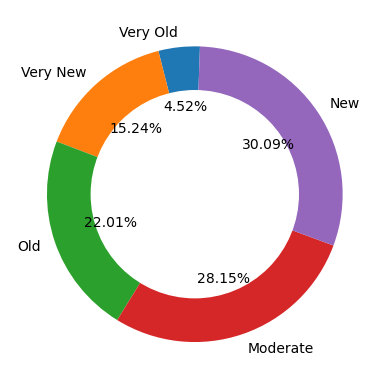

In [38]:
# Your Solution
plt.pie(
    df['flat_age_type'].value_counts()[::-1],
    labels= df['flat_age_type'].value_counts()[::-1].index,
    shadow=False,
    startangle=88,
    autopct='%.2f%%',
    )
 
my_circle = plt.Circle((0,0),0.7,color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
 
plt.show()

#### The following code maps the respective town into its respective location.

In [14]:
#run this code after you have completed Q7
map_location = {'ANG MO KIO': 'North East', 'BEDOK': 'East', 'BISHAN': 'Central',
                    'BUKIT BATOK': 'West', 'BUKIT MERAH': 'Central', 'BUKIT PANJANG': 'West',
                    'BUKIT TIMAH': 'Central', 'CENTRAL AREA': 'Central', 'CHOA CHU KANG': 'West',
                    'CLEMENTI': 'West', 'GEYLANG': 'Central', 'HOUGANG': 'North East', 'JURONG EAST': 'West',
                    'JURONG WEST': 'West', 'KALLANG/WHAMPOA': 'Central', 'PASIR RIS': 'East', 'PUNGGOL': 'North East',
                    'QUEENSTOWN': 'West', 'SEMBAWANG': 'North', 'SENGKANG': 'North East', 'SERANGOON': 'North East',
                    'TAMPINES': 'East', 'TOA PAYOH': 'Central', 'WOODLANDS': 'North', 'YISHUN': 'North',
                    'MARINE PARADE': 'East', 'LIM CHU KANG': 'North'}
df["location"] = df.loc[:, "town"].map(map_location)
df

,year,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,flat_age_type,location
49780,2017,08,QUEENSTOWN,3 ROOM,53,C'WEALTH DR,28 TO 30,63.0,Model A,2015,590000.0,97,Very New,West
15206,2015,11,BUKIT MERAH,4 ROOM,55,HAVELOCK RD,16 TO 18,89.0,Model A,2013,736888.0,97,Very New,Central
5682,2015,05,BUKIT MERAH,4 ROOM,58,HAVELOCK RD,25 TO 27,94.0,Model A,2013,750000.0,97,Very New,Central
49794,2017,08,QUEENSTOWN,4 ROOM,50,C'WEALTH DR,25 TO 27,88.0,Model A,2015,738000.0,97,Very New,West
14289,2015,10,QUEENSTOWN,4 ROOM,23,GHIM MOH LINK,22 TO 24,92.0,Model A,2013,718000.0,97,Very New,West
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67973,2018,07,GEYLANG,3 ROOM,22,BALAM RD,04 TO 06,60.0,Standard,1967,246000.0,48,Very Old,Central
69333,2018,07,TOA PAYOH,3 ROOM,110,LOR 1 TOA PAYOH,04 TO 06,65.0,Improved,1967,285000.0,48,Very Old,Central
66013,2018,06,JURONG EAST,3 ROOM,37,TEBAN GDNS RD,01 TO 03,67.0,Improved,1966,226000.0,47,Very Old,West
72608,2018,09,JURONG EAST,3 ROOM,37,TEBAN GDNS RD,01 TO 03,67.0,Improved,1966,215000.0,47,Very Old,West


#### g)	[2m] We would like to summarize the median resale price of flats by location (in columns) and flat_age_type (in rows) in a table. Store the information in a dataframe named summary.

Hence, draw a heatmap to visualize the data in summary.
Note that you are to use the red-blue color scheme.


In [15]:
# Your Solution
summary = df.groupby(['flat_age_type', 'location'], as_index=False).median()
summary = summary.pivot(index = 'flat_age_type', columns = 'location', values = 'resale_price')

C:\Users\user\AppData\Local\Temp\ipykernel_27840\855929391.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  summary = df.groupby(['flat_age_type', 'location'], as_index=False).median()


In [16]:
summary #run this code to display the data

location,Central,East,North,North East,West
flat_age_type,,,,,
Very Old,288000.0,352500.0,230000.0,250500.0,315000.0
Old,388000.0,365000.0,280000.0,335000.0,345000.0
Moderate,562500.0,440000.0,335000.0,408844.0,350000.0
New,668000.0,480000.0,392000.0,430000.0,430000.0
Very New,750000.0,640000.0,385000.0,445000.0,470000.0


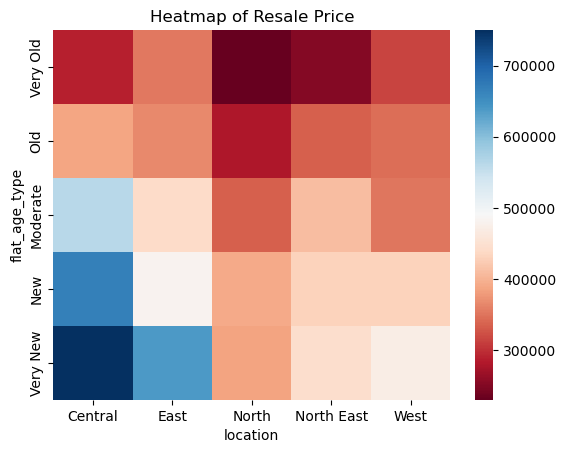

In [17]:
# Your Solution - heatmap=
sns.heatmap(summary, cmap='RdBu')
plt.title('Heatmap of Resale Price')
plt.show()

#### h) [2m] Plot a horizontal grouped bar chart to visualize the data in the dataframe summary from g).
Label the x-axis as ‘Resale Price' and y-axis as 'Flat Age Type'. The chart size should be enlarged to 12 by 6.


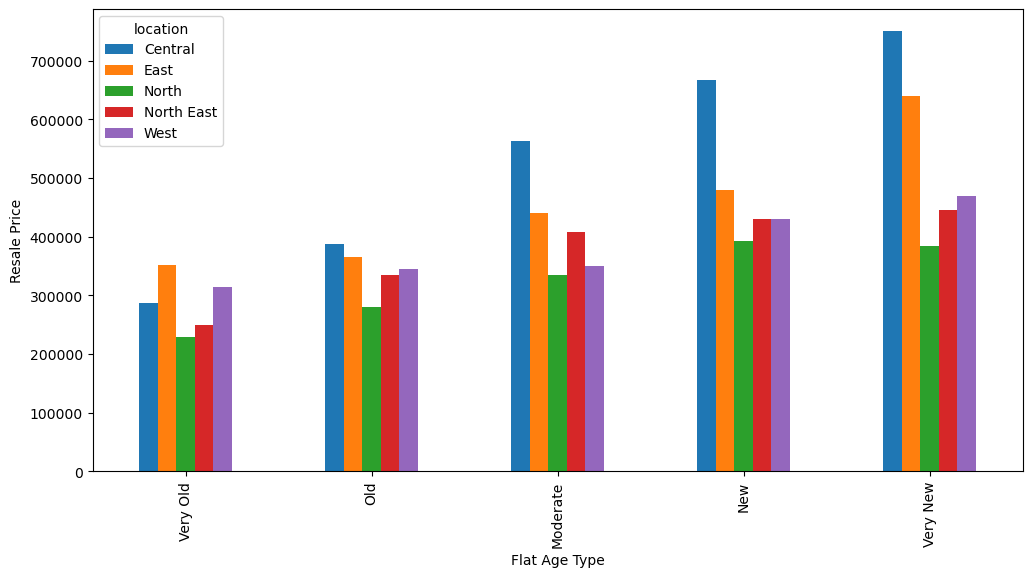

In [18]:
# Your Solution
summary.plot(kind= 'bar', figsize=(12, 6))
plt.xlabel("Flat Age Type")
plt.ylabel('Resale Price')
plt.show()

#### i) [2m] We like to compare how the flat age type affects the resale price for flat of type 3, 4 and 5 Room. Draw a relevant side by side boxplot for the comparison. The chart size should be enlarged to 16 by 5. The x-axis should be ‘Flat Type’.

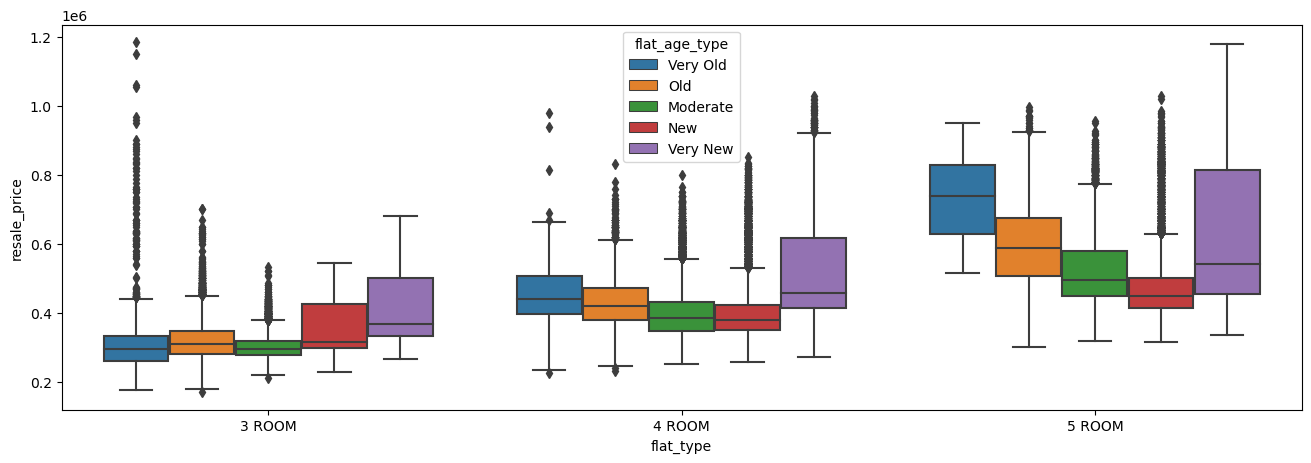

In [19]:
# Your Solution
bpdf = df[(df.flat_type.str.contains('3')) | (df.flat_type.str.contains('4')) | df.flat_type.str.contains('5')]
plt.figure(figsize=(16,5))
sns.boxplot(y = bpdf["resale_price"], x = bpdf["flat_type"], hue = bpdf['flat_age_type'],  data = bpdf)
plt.show()

#### j) [3m] Plot a small-multiples plot, which shows a histogram of the resale prices of flats for each flat_type (3, 4 and 5 room flats only) and location. The bin range should be within the limits of the max and min resale price. The bin width should be set as 50,000.

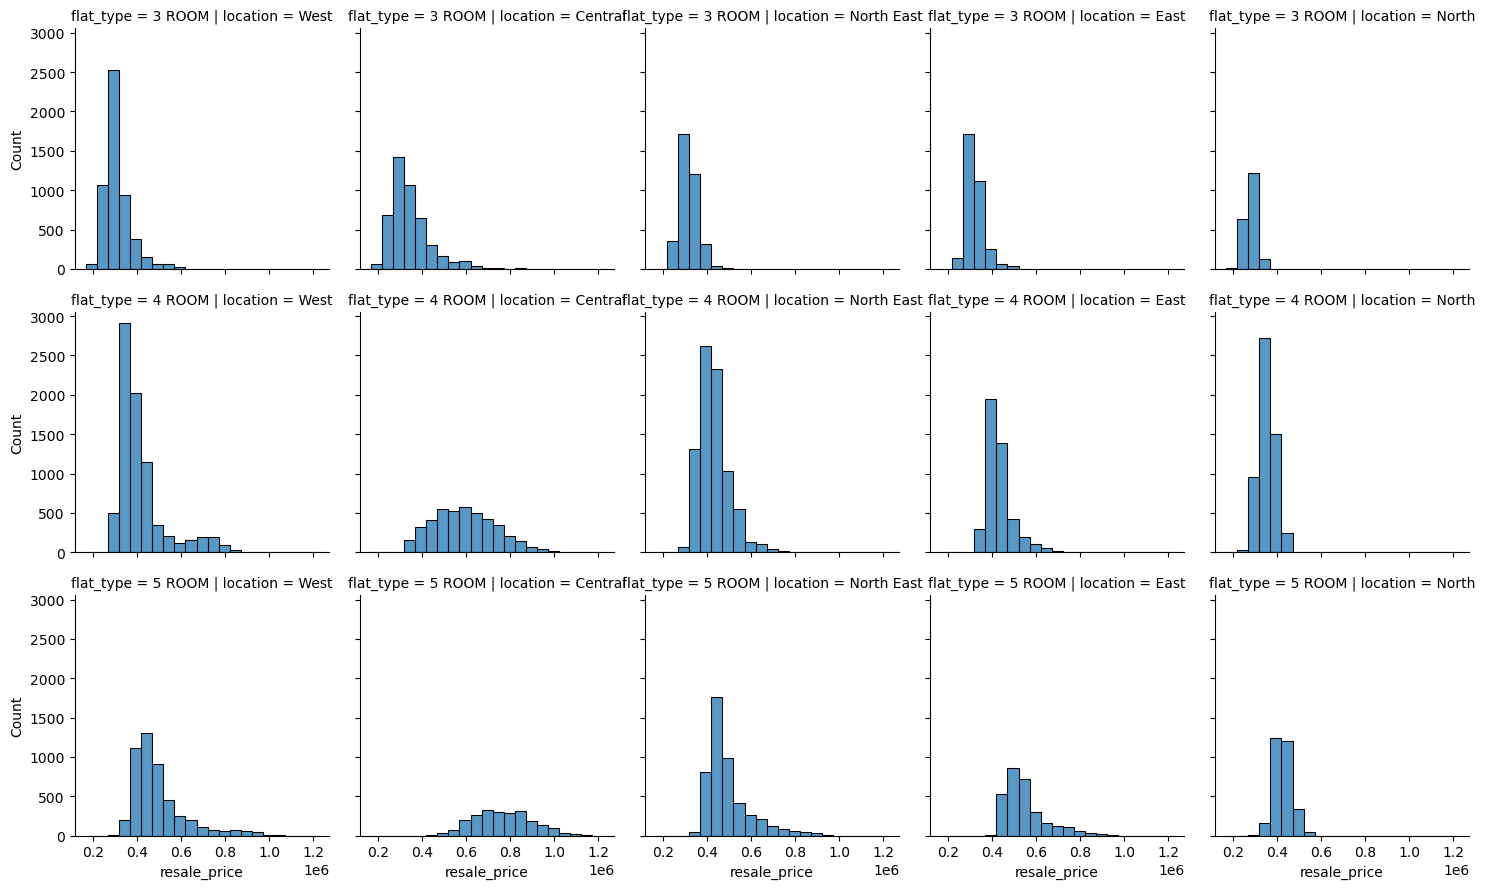

In [20]:
# Your Solution
g = sns.FacetGrid(bpdf, col="location",  row="flat_type")
g.map_dataframe(sns.histplot, x="resale_price", binwidth=50000, binrange=(bpdf.resale_price.min(), bpdf.resale_price.max()))

### Data Modelling

#### k) [2m] Develop a Simple Linear Regression Model (SLRM) to predict the resale price of flats based on the floor area sqm. You are to split the dataset into training and test data (90% training, 10% test). Finally, print out the equation of the model.

In [21]:
# Your Solution
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split 
lm = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(df[['floor_area_sqm']], df['resale_price'], test_size=0.1, random_state=0)
lm.fit(X_train, y_train)
inter = lm.intercept_.round(2)
coeff = lm.coef_[0].round(2)

Hence, print the equation of your model.

In [22]:
# Your Solution
print(f'The equation of the model is: y = {coeff}x + {inter}, where y is the resale price of the flat and x is the flor area sqm of the flat')

The equation of the model is: y = 3851.74x + 64531.88, where y is the resale price of the flat and x is the flor area sqm of the flat


#### l) [3m] Make predictions using your test data and plot a scatterplot of Actual vs Predicted. Draw in a straight line (in red) with equation Actual = Predicted. 

Based on the graph plotted above, is a simple linear regression model suitable? Explain your answer clearly.

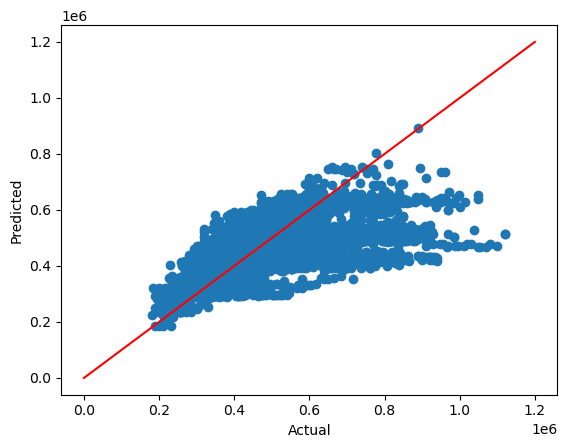

In [23]:
# Your Solution
yhat = lm.predict(X_test)
plt.scatter(y_test, yhat)
plt.plot([0, 1.2 * 10 ** 6], [0, 1.2 * 10 ** 6], color="red")
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

#### State your conclusion here
Yes, it is. The points are gathered around the y = x line, which means the predicted values are close to the actual values. However, the predictions are underpredictions as the actual values get larger.

### Data Visualization (Maps) 

The latitude and longitude of each town is given in the file `data2.csv`.

In [24]:
dfcoord = pd.read_csv("data2.csv")
dfcoord

,town,lat,long
0,ANG MO KIO,1.367950,103.838660
1,BEDOK,1.324260,103.953000
2,BISHAN,1.349999,103.849997
3,BUKIT BATOK,1.350020,103.749270
4,BUKIT MERAH,1.285830,103.819000
5,BUKIT PANJANG,1.375165,103.757497
6,BUKIT TIMAH,1.342417,103.776630
7,CENTRAL AREA,1.291670,103.850000
8,CHOA CHU KANG,1.386150,103.746120
9,CLEMENTI,1.314352,103.765236


#### m) [2m] Find the average resale price of the HDB flats in each town. Merge this data with the data from dfcoord. Store the data in a new dataframe named result.

In [25]:
# Your Solution
result = df.groupby('town', as_index = False).mean().round(2).merge(dfcoord, on = 'town')

C:\Users\user\AppData\Local\Temp\ipykernel_27840\4245529445.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  result = df.groupby('town', as_index = False).mean().round(2).merge(dfcoord, on = 'town')


In [26]:
result #run this code to display the data

,town,floor_area_sqm,lease_commence_date,resale_price,remaining_lease,lat,long
0,ANG MO KIO,83.71,1983.38,416202.77,65.93,1.367950,103.838660
1,BEDOK,88.37,1983.40,411282.64,66.04,1.324260,103.953000
2,BISHAN,106.48,1989.95,630500.78,72.42,1.349999,103.849997
3,BUKIT BATOK,92.85,1988.87,386543.90,71.42,1.350020,103.749270
4,BUKIT MERAH,86.02,1989.74,554528.50,72.22,1.285830,103.819000
5,BUKIT PANJANG,104.77,1996.77,420398.46,79.33,1.375165,103.757497
6,BUKIT TIMAH,110.21,1983.67,710576.33,66.06,1.342417,103.776630
7,CENTRAL AREA,83.27,1993.65,656530.83,76.31,1.291670,103.850000
8,CHOA CHU KANG,110.82,1995.56,390970.30,78.14,1.386150,103.746120
9,CLEMENTI,84.91,1984.01,459319.14,66.59,1.314352,103.765236


#### n) [4m] Create a map located at [1.29016, 103.852] with zoom_start = 11. 
Add in markers for each of the towns in result. When user clicks on the marker, display the name of the town and the average resale price of flats in that town.
 
You may use a for loop in this question if required.


In [27]:
# Your Solution
sing_map = folium.Map([1.29016, 103.852], zoom_start = 11)

latitudes = list(result.lat)
longitudes = list(result.long)
labelprice = list(result.resale_price)
labeltown = list(result.town)
 
for lat, lng, labelprice, labeltown in zip(latitudes, longitudes, labelprice, labeltown):
    folium.Marker([lat, lng], popup = labeltown + ': $' + str(labelprice)).add_to(sing_map)    

sing_map

<hr>
© NUS High School of Math & Science